# Visualizing data and parameters

This notebook helps determine the patch of the road, as well has the median of the trajectory length

## Preambles

Loading and previewing some data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from seig import eig as eig

In [3]:
df = pd.read_csv('kalmaned2.csv')

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,...,v_Vel,v_Acc,Lane_ID,Preceeding,Following,Space_Hdwy,Time_Hdwy,Vehicle_EKF_Accel,Vehicle_EKF_Theta,Vehicle_EKF_Velocity
0,0,0,1,270,569,1118847869000,51.164,112.878,6451136.708,1873294.084,...,19.89,0.00,5,0,0,0.0,0.0,0.352090,-0.000532,18.144384
1,1,1,1,271,569,1118847869100,51.153,114.878,6451138.053,1873292.603,...,19.89,0.00,5,0,0,0.0,0.0,0.606310,-0.000481,18.179593
2,2,2,1,272,569,1118847869200,51.143,116.878,6451139.397,1873291.122,...,19.89,0.00,5,0,0,0.0,0.0,0.662968,0.000942,18.265646
3,3,3,1,273,569,1118847869300,51.244,118.815,6451140.617,1873289.614,...,19.89,0.00,5,0,0,0.0,0.0,0.299653,0.001631,18.312187
4,4,4,1,274,569,1118847869400,51.234,120.814,6451141.961,1873288.133,...,19.89,1.07,5,0,0,0.0,0.0,0.289715,0.000712,18.325577


<AxesSubplot:>

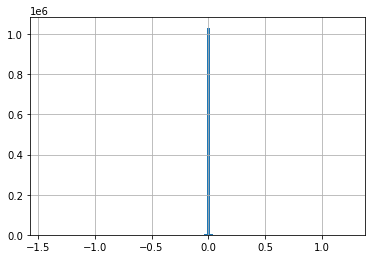

In [5]:
df['Vehicle_EKF_Theta'].hist(bins=100)

## Determining the road patch boundaries 

By plotting the histogram and the max, min of the vehicle coordinates

In [6]:
df['Local_X'].min()

0.879

In [7]:
df['Local_X'].max()

73.318

<AxesSubplot:>

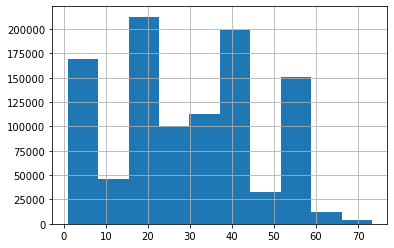

In [8]:
df['Local_X'].hist()

We see that the X of vehicles range from 0 to approximately 75ft.

<AxesSubplot:>

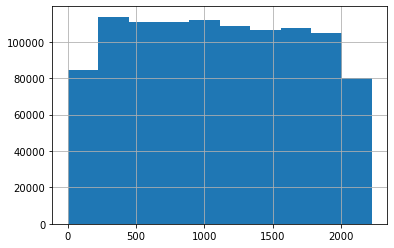

In [9]:
df['Local_Y'].hist()

In [10]:
df['Local_Y'].min()

0.0

In [11]:
df['Local_Y'].max()

2224.58

Similarly, for the Y coordinates, ranging from 0 to 2224.58ft.

## Generate a bunch of random trajectories inside the road patch

In [12]:
import pandas as pd
from ngsim_processor import NGSIM_Processor as NGSIM

if __name__ == '__main__':
    container_t = []
    container_x = []
    container_y = []
    num_of_trajs = 200
    traj_length = []

    df = pd.read_csv('kalmaned2.csv')
    ngsim = NGSIM(df)
    ngsim.set_patch(0.0, 75.0, 500.0, 1050.0) # see the notebook df_stats.py to see where these numbers come from

    for i in range(num_of_trajs):
        t, x, y = ngsim.get_trajectory_random_in_patch()
        container_t.append(t)
        container_x.append(x)
        container_y.append(y)
        traj_length.append(len(t))
        if i%50 == 0:
            print('Trajectory {:d} generated, length {:d}'.format(i, len(t)))

    print('Process completed')


# See PyCharm help at https://www.jetbrains.com/help/pycharm/

NGSIM Processor is initialized
Trajectory 0 generated, length 116
Trajectory 50 generated, length 242
Trajectory 100 generated, length 289
Trajectory 150 generated, length 100
Process completed


This is the distribution of the starting time of the trajectory (so that it can be useful to set the starting gtime of the simulator)

(array([ 7.,  5.,  8.,  8., 16.,  6., 19.,  9., 14.,  9., 10.,  5., 11.,
         7., 13.,  8.,  8., 17.,  8., 12.]),
 array([ 49800.,  82285., 114770., 147255., 179740., 212225., 244710.,
        277195., 309680., 342165., 374650., 407135., 439620., 472105.,
        504590., 537075., 569560., 602045., 634530., 667015., 699500.]),
 <BarContainer object of 20 artists>)

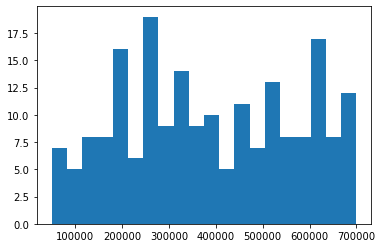

In [13]:
plt.hist(np.array([x[0] - df['Global_Time'].min() for x in container_t]), bins = 20)

Set all entrance time to zero

In [14]:
for i in range(num_of_trajs):
    container_t[i] -= container_t[i][0]
    # container_t[i] -= df['Global_Time'].min()

(array([ 1.,  0.,  0.,  3.,  1.,  5.,  6., 12.,  9.,  5.,  9.,  7.,  2.,
         4.,  7.,  8.,  9.,  6.,  1.,  2.,  5.,  3.,  4.,  2.,  8.,  0.,
         3.,  3.,  1.,  3.,  7.,  4.,  0.,  4.,  2.,  1.,  1.,  1.,  1.,
         0.,  0.,  1.,  1.,  1.,  0.,  1.,  2.,  3.,  2.,  1.,  0.,  5.,
         1.,  4.,  4.,  3.,  1.,  1.,  2.,  1.,  2.,  1.,  3.,  2.,  0.,
         0.,  0.,  0.,  1.,  0.,  1.,  3.,  1.,  0.,  2.]),
 array([ 81.        ,  86.05333333,  91.10666667,  96.16      ,
        101.21333333, 106.26666667, 111.32      , 116.37333333,
        121.42666667, 126.48      , 131.53333333, 136.58666667,
        141.64      , 146.69333333, 151.74666667, 156.8       ,
        161.85333333, 166.90666667, 171.96      , 177.01333333,
        182.06666667, 187.12      , 192.17333333, 197.22666667,
        202.28      , 207.33333333, 212.38666667, 217.44      ,
        222.49333333, 227.54666667, 232.6       , 237.65333333,
        242.70666667, 247.76      , 252.81333333, 257.86666667,

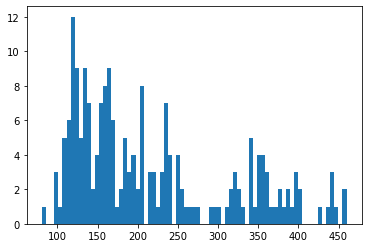

In [15]:
plt.hist(traj_length, bins=75)

From this distribution of trajectory length, it makes sense to extrapolate a little bit of trajectories to timestep 94, while trimming other longer trajectories to 94 timesteps. 

## Trim and lengthen trajectories

First, convert everything to numpy arrays

In [16]:
for i in range(num_of_trajs):
    container_t[i] = np.array(container_t[i])
    container_x[i] = np.array(container_x[i])
    container_y[i] = np.array(container_y[i])

In [17]:
from trim_and_lengthen import lengthen_trajectory_by_spline, trim_trajectory

In [18]:
median_traj_length = 150
new_t_vec = np.arange(0, median_traj_length * 100, 100)
container_x_new = container_x.copy()
container_y_new = container_y.copy()
for i in range(num_of_trajs):
    if traj_length[i] < median_traj_length:
        # Trajectory is shorter than median length, prolong the trajectory
        new_x_vec = lengthen_trajectory_by_spline(container_t[i], container_x[i], new_t_vec)
        new_y_vec = lengthen_trajectory_by_spline(container_t[i], container_y[i], new_t_vec)
        container_x_new[i] = new_x_vec
        container_y_new[i] = new_y_vec
    else:
        # Trajectory is equal or longer than the median length, trim the trajectory
        new_x_vec = trim_trajectory(container_t[i], container_x[i], new_t_vec)
        new_y_vec = trim_trajectory(container_t[i], container_y[i], new_t_vec)
        container_x_new[i] = new_x_vec
        container_y_new[i] = new_y_vec

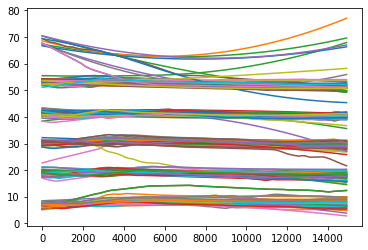

In [19]:
for i in range(num_of_trajs):
    plt.plot(new_t_vec, container_x_new[i])

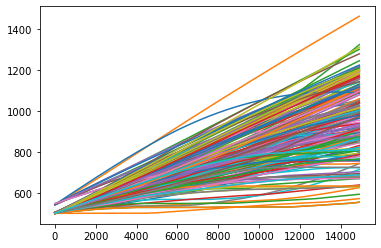

In [20]:
for i in range(num_of_trajs):
    plt.plot(new_t_vec, container_y_new[i])

Starting points of the observed trajectories. Should be close to the patch start at 500ft.

(array([ 1.,  1.,  1.,  3., 25., 41., 34., 24., 23., 24.,  3.,  6.,  2.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  2.,  2.,  1.,  0.,  1.,  2.,  0.,  0.,
         0.,  2.]),
 array([497.23794352, 497.86734422, 498.49674493, 499.12614563,
        499.75554634, 500.38494705, 501.01434775, 501.64374846,
        502.27314916, 502.90254987, 503.53195058, 504.16135128,
        504.79075199, 505.42015269, 506.0495534 , 506.67895411,
        507.30835481, 507.93775552, 508.56715622, 509.19655693,
        509.82595764, 510.45535834, 511.08475905, 511.71415976,
        512.34356046, 512.97296117, 513.60236187, 514.23176258,
        514.86116329, 515.49056399, 516.1199647 , 516.7493654 ,
        517.37876611, 518.0081

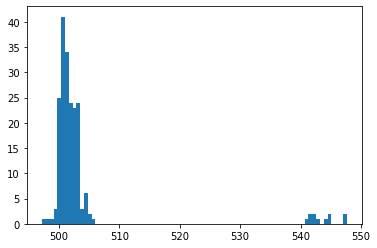

In [21]:
plt.hist(np.array([x[0] for x in container_y_new]), bins=80)

## Offsetting the trajectory starting point to zero

In [22]:
for i in range(num_of_trajs):
    container_y_new[i] = container_y_new[i] - container_y_new[i][0]
    container_x_new[i] = container_x_new[i] - container_x_new[i][0]

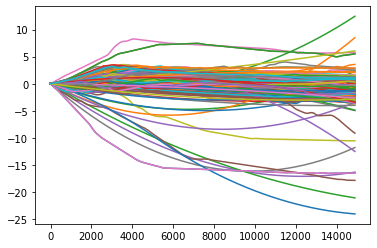

In [23]:
for i in range(num_of_trajs):
    plt.plot(new_t_vec, container_x_new[i])

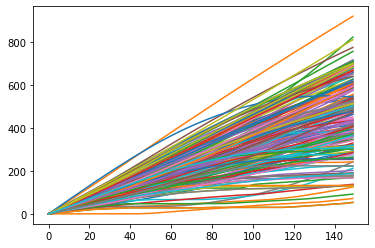

In [24]:
for i in range(num_of_trajs):
    # plt.plot(new_t_vec, container_y_new[i])
    plt.plot(container_y_new[i])

## Save these trajectories into a file

In [25]:
import pickle

file_to_store = open("trajectories.pyo", "wb")
object_to_store = {
    't_vec': new_t_vec,
    'x_vec': container_x_new,
    'y_vec': container_y_new
}

pickle.dump(object_to_store, file_to_store)
file_to_store.close()

# FPCA decomposition and distribution learning

In [26]:
import sklearn
import skfda

In [27]:
fdgrx = skfda.FDataGrid(container_x_new, new_t_vec)
# fdgry = skfda.FDataGrid(container_y_new, new_t_vec)
fdgry = skfda.FDataGrid(container_y_new, np.arange(new_t_vec.shape[0]))

## FPCA decomposition for X component

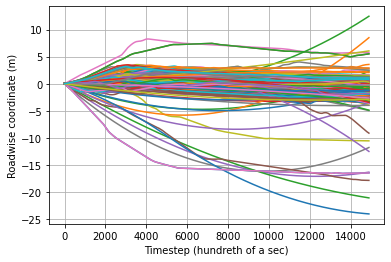

In [28]:
fdgrx.plot()
print('')
plt.xlabel('Timestep (hundreth of a sec)')
plt.ylabel('Roadwise coordinate (m)')
plt.grid(True)
print('')

In [29]:
from skfda.exploratory.visualization import plot_fpca_perturbation_graphs
from skfda.preprocessing.dim_reduction.projection import FPCA

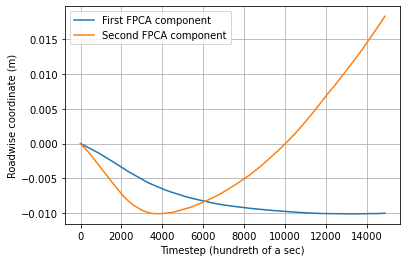

In [30]:
fpca_discretized_rw = FPCA(n_components=2)
fpca_discretized_rw.fit(fdgrx)
fpca_discretized_rw.components_.plot()
plt.xlabel('Timestep (hundreth of a sec)')
plt.ylabel('Roadwise coordinate (m)')
plt.grid(True)
plt.legend(['First FPCA component', 'Second FPCA component'])
print('')

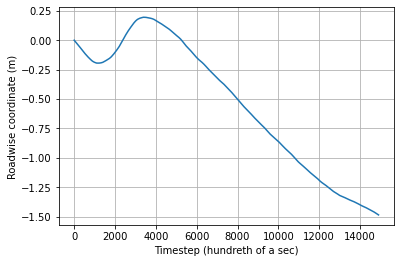

In [31]:
fpca_discretized_rw.mean_.plot()
plt.xlabel('Timestep (hundreth of a sec)')
plt.ylabel('Roadwise coordinate (m)')
plt.grid(True)
print('')
mean_curve = fpca_discretized_rw.mean_.data_matrix.reshape((-1))

In [32]:
fpca_discretized_rw.explained_variance_ratio_

array([0.9291879 , 0.05561219])

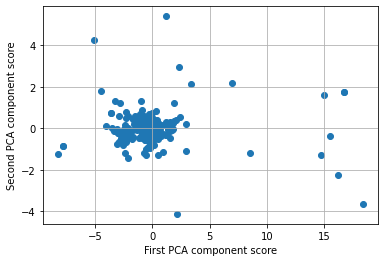

In [33]:
friendly_basis_rw = fpca_discretized_rw.components_.data_matrix.squeeze().transpose()
coeffs_rw = np.matmul(container_x_new - mean_curve, friendly_basis_rw)
plt.scatter(coeffs_rw[:,0], coeffs_rw[:,1])
plt.xlabel('First PCA component score')
plt.ylabel('Second PCA component score')
plt.grid(True)

## FPCA with Y component

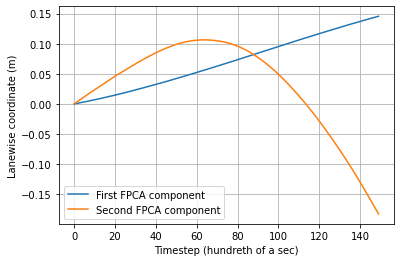

In [34]:
fpca_discretized_rw2 = FPCA(n_components=2)
fpca_discretized_rw2.fit(fdgry)
fpca_discretized_rw2.components_.plot()
plt.xlabel('Timestep (hundreth of a sec)')
plt.ylabel('Lanewise coordinate (m)')
plt.grid(True)
plt.legend(['First FPCA component', 'Second FPCA component'])
print('')

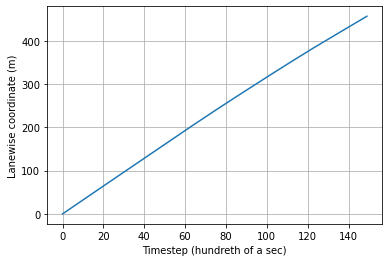

In [35]:
fpca_discretized_rw2.mean_.plot()
plt.xlabel('Timestep (hundreth of a sec)')
plt.ylabel('Lanewise coordinate (m)')
plt.grid(True)
print('')
mean_curve2 = fpca_discretized_rw2.mean_.data_matrix.reshape((-1))

In [36]:
fpca_discretized_rw2.explained_variance_ratio_

array([0.97267285, 0.02504756])

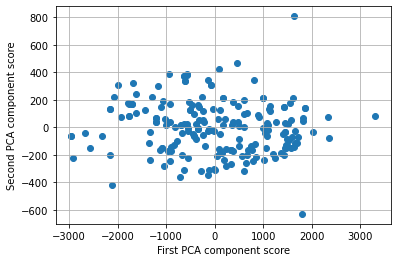

In [37]:
friendly_basis_rw2 = fpca_discretized_rw2.components_.data_matrix.squeeze().transpose()
coeffs_rw2 = np.matmul(container_y_new - mean_curve2, friendly_basis_rw2)
plt.scatter(coeffs_rw2[:,0], coeffs_rw2[:,1])
plt.xlabel('First PCA component score')
plt.ylabel('Second PCA component score')
plt.grid(True)

See how well the two components will approximate the real trajectory, we reconstruct the trajectory from the PCA loads:

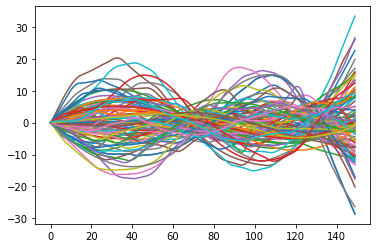

In [38]:
for i in range(100):
    plt.plot(container_y_new[i] - mean_curve2 - (friendly_basis_rw2 @ coeffs_rw2[i].reshape((2,1))).reshape(-1))

The curves show the deviation from reconstruction with actual data that generated the corresponding PCA load.

## Fitting a distribution onto the data

In [39]:
# Plotting helper function

import itertools
from scipy import linalg
import matplotlib as mpl
def plot_results(X, Y_, means, covariances, index, title):
    color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])
    splot = plt.subplot(1, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = np.linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    #plt.xlim(-3.0, 3.0)
    #plt.ylim(-3.0, 3.0)
    #plt.xticks(range(-3, 4))
    #plt.xticks(range(-3, 4))
    plt.xlim(X[:,0].min(), X[:,0].max())
    plt.ylim(X[:,1].min(), X[:,1].max())
    plt.gca().set_aspect('equal')
    plt.title(title)

In [40]:
from sklearn.mixture import GaussianMixture

Learning the X functionals (lanewise coordinate) distribution

In [41]:
gm_rw = GaussianMixture(n_components=1, random_state=0).fit(coeffs_rw)

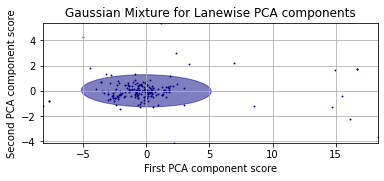

In [42]:
plot_results(coeffs_rw, gm_rw.predict(coeffs_rw), gm_rw.means_, gm_rw.covariances_, 0, 'Gaussian Mixture for Lanewise PCA components')
plt.xlabel('First PCA component score')
plt.ylabel('Second PCA component score')
plt.grid(True)

Learning the Y functionals (roadwise coordinate) distribution

In [43]:
gm_rw2 = GaussianMixture(n_components=1, random_state=0).fit(coeffs_rw2)

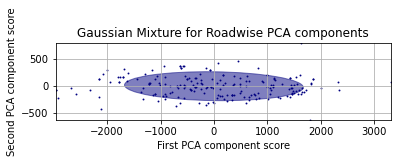

In [44]:
plot_results(coeffs_rw2, gm_rw2.predict(coeffs_rw2), gm_rw2.means_, gm_rw2.covariances_, 0, 'Gaussian Mixture for Roadwise PCA components')
plt.xlabel('First PCA component score')
plt.ylabel('Second PCA component score')
plt.grid(True)

## Learned parameters

For the X component

In [45]:
gm_rw.means_

array([[8.88178420e-18, 7.77156117e-18]])

In [46]:
gm_rw.covariances_

array([[[13.23092189, -0.12800615],
        [-0.12800615,  0.8115547 ]]])

For the Y component

In [47]:
gm_rw2.means_

array([[ 1.40403245e-13, -1.56603619e-13]])

In [48]:
gm_rw2.covariances_

array([[[1400004.04768139,  -18879.40621042],
        [ -18879.40621042,   36728.82860244]]])

In [49]:
eigvs, _ = np.linalg.eigh(gm_rw2.covariances_)
np.sqrt(eigvs)

array([[ 190.96446274, 1183.32812451]])

Export these gaussian mixture model to a file so that we can load it to our NGSIM simulator

In [50]:
import pickle as pkl

pickle.dump({
    'cov': gm_rw2.covariances_,
    'mu': gm_rw2.means_,
    'mean_curve': mean_curve2,
    'friendly_basis': friendly_basis_rw2
}, open( "y.pkl", "wb" ) )

print('Y component Gaussian Mixture dumped to y.pkl')

pickle.dump({
    'cov': gm_rw.covariances_,
    'mu': gm_rw.means_,
    'mean_curve': mean_curve,
    'friendly_basis': friendly_basis_rw
}, open( "x.pkl", "wb" ) )

print('X component Gaussian Mixture dumped to x.pkl')

Y component Gaussian Mixture dumped to y.pkl
X component Gaussian Mixture dumped to x.pkl


# Decorrelating the PCA load distribution and scaling the eigenvalues for "circular distribution"

To ensure the correctness of the analysis on thresholding, it's wise to convert the ellipse distribution of PCA loads to a circular one (i.e., correlation = 0). We do this by performing PCA.

In [51]:
import scipy

In [52]:
y_pca_loads_covar = gm_rw2.covariances_[0]

In [53]:
y_pca_loads_R = np.linalg.inv(scipy.linalg.sqrtm(scipy.linalg.inv(y_pca_loads_covar)))
y_pca_loads_Q = np.linalg.inv(y_pca_loads_R)

In [54]:
affine_coeffs_rw2 = coeffs_rw2 @ y_pca_loads_Q.T

 <ipython-input-39-e983dbcdf3ec>:23: RuntimeWarning:divide by zero encountered in double_scalars


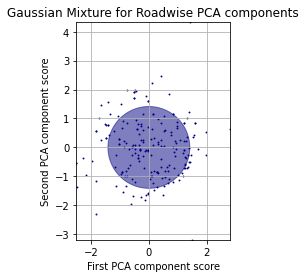

In [55]:
plot_results(affine_coeffs_rw2, gm_rw2.predict(coeffs_rw2), gm_rw2.means_ @ y_pca_loads_Q.T, np.reshape(y_pca_loads_Q @ gm_rw2.covariances_[0,:] @ y_pca_loads_Q.T, (1,2,2)), 0, 'Gaussian Mixture for Roadwise PCA components')
plt.xlabel('First PCA component score')
plt.ylabel('Second PCA component score')
plt.grid(True)

# Visualizing some likelihood curves

First, we define info_e2 = $1/\sigma_\epsilon^2$, related to the measurement noise:

In [56]:
from scipy.stats import norm
info_e2 = 20

In [57]:
lambda_max_R = eig(y_pca_loads_R)[0][0]

This is a code for generation of a single trajectory from the PCA load of a_sample

## With noise

In [58]:
noise_samples = np.zeros((friendly_basis_rw2.shape[0],))
for i in range(friendly_basis_rw2.shape[0]):
    noise_samples[i] = norm.rvs() * np.sqrt(1./info_e2)

[array([0., 0.]), array([5.0000000e-01, 1.1659534e-18]), array([1.91510212e-18, 1.00000000e+00]), array([2., 2.])]


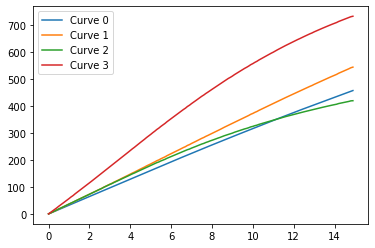

In [59]:
a_samples = [np.array([0,0]),y_pca_loads_R @ np.array([0.5,0]), y_pca_loads_R @ np.array([0,1]), y_pca_loads_R @ np.array([2,2])]
c_samples = [y_pca_loads_Q @ x for x in a_samples]
print(c_samples)
# Generate a sample trajectory curve
curvs = []
for index, a_sample in enumerate(a_samples):
    curv = np.zeros((friendly_basis_rw2.shape[0],))
    for i in range(friendly_basis_rw2.shape[0]):
        curv[i] = friendly_basis_rw2[i].reshape((1,2)) @ a_sample.reshape((2,1)) + noise_samples[i] * (lambda i: 0 if i == 0 else 1)(index)
        # note the noise is already included: sigma_e * e where e~N(0,1)
        # the first curve is without noise!
    curv = curv + mean_curve2
    curvs.append(curv)
    # Plot the sample curve for reference
    plt.plot(np.arange(friendly_basis_rw2.shape[0])/10., curv, label='Curve ' + str(index))
plt.legend()

Noise signature

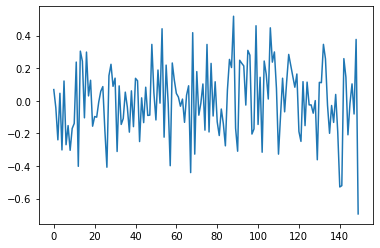

In [60]:
plt.plot(noise_samples)

## Without noise

a_samples = [np.array([0,0]),y_pca_loads_R @ np.array([0.5,0]), y_pca_loads_R @ np.array([0,1]), y_pca_loads_R @ np.array([2,2])]
c_samples = [y_pca_loads_Q @ x for x in a_samples]
print(c_samples)
# Generate a sample trajectory curve
curvs = []
noise_samples = np.zeros((friendly_basis_rw2.shape[0],))
for index, a_sample in enumerate(a_samples):
    curv = np.zeros((friendly_basis_rw2.shape[0],))
    for i in range(friendly_basis_rw2.shape[0]):
        curv[i] = friendly_basis_rw2[i].reshape((1,2)) @ a_sample.reshape((2,1))
        # note the noise is already included: sigma_e * e where e~N(0,1)
        # the first curve is without noise!
    curv = curv + mean_curve2
    curvs.append(curv)
    # Plot the sample curve for reference
    plt.plot(np.arange(friendly_basis_rw2.shape[0])/10., curv, label='Curve ' + str(index))
plt.legend()

## Entropy curves generation

An example of measurement noise added to the curve measurement

In [61]:
from otqd.otqd import OTQD

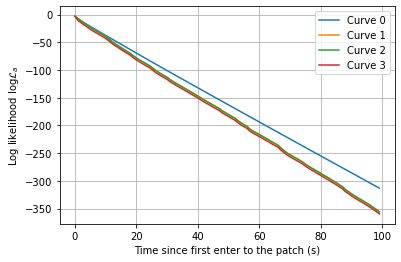

In [88]:
fix, ax = plt.subplots()
howlong=100
covar_sequence = np.zeros((howlong, 2, 2))
time_for_plot = np.arange(howlong)/10. # howlong seconds
mls = []
for index, curve in enumerate(curvs):
    # curve = curv.copy() # use the curv which is the trajectory generated from a_sample defined above
    ml_with_time_d = np.zeros(curve.shape[0],)
    otqd = OTQD(info_a = np.linalg.inv(gm_rw2.covariances_) * 1.,mu_a = gm_rw2.means_.transpose(),info_e2 = info_e2,pca_mean = mean_curve2,pca_components = friendly_basis_rw2, i_max=1)
    for k in range(howlong): # should match time_for_plot
        otqd.new_measurement(curve[k])
        ml_log_likelihood, ml_covar = otqd.calculate_log_likelihood_with_covar()
        where_ml_max = np.argmax(ml_log_likelihood)
        ml_with_time_d[k] = ml_log_likelihood[where_ml_max]
        covar_sequence[k,:,:] = ml_covar[where_ml_max,:,:]
    plt.plot(ml_with_time_d[0:howlong], label='Curve ' + str(index)) # should also match time_for_plot
    mls.append(ml_with_time_d)
plt.xlabel('Time since first enter to the patch (s)')
plt.ylabel('Log likelihood $\log \mathcal{L}_a$')
plt.legend()
plt.grid(True)

Relative entropy curve related to **the standard curve** (corresponding to $\mu=0$)

(0.0, 80.0)

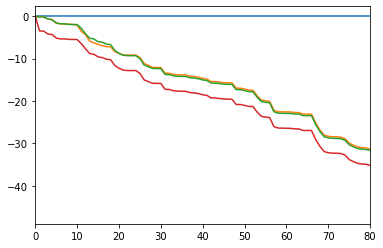

In [89]:
mlcs = []
for mlc in mls:
    ml = mlc - mls[0]
    plt.plot(ml)
    mlcs.append(ml)
plt.xlim((0,80))

# Drawing the thresholding curves

These are the likelihood curves for **no measurement noise** (should approximate the immediately above graph). This presents the analytical formula to draw the curves directly from $a$, as an express way compared to creating a curve then run OTQD on this curve like above. 

This is best for understanding the individual terms and ensure the validity of the OTQD, as well as thresholding curve drawing. **Formula page 11**.

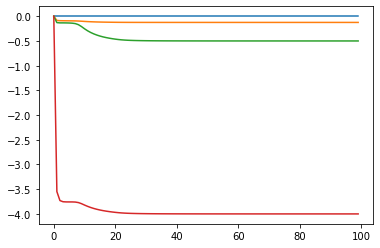

In [90]:
for a in a_samples:
    first_term = np.zeros((howlong,))
    second_term = np.zeros((howlong,1,2))
    second_term_h = np.zeros((howlong,))
    all_terms = np.zeros((howlong,))
    for i in range(howlong): 
        fbi = friendly_basis_rw2[i].reshape((2,1))
        first_term[i] = first_term[i-1] + info_e2 * np.square(fbi.T @ a)
        second_term[i,:] = (second_term[i-1,:] + fbi.T * (fbi.T @ a)) # phi.T phi.T a
        first_term_f = first_term[i].item()
        second_term_f = -(info_e2**2) * second_term[i,:] @ covar_sequence[i,:,:] @ second_term[i,:].T
        second_term_h[i] = second_term_f
        all_terms[i] = -0.5 * (first_term_f + second_term_f)
    plt.plot(all_terms)

The official draw the likelihood curve in case of no measurement noise

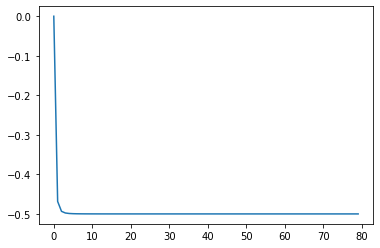

In [91]:
sps = 0
U = np.zeros((2,2))
V = np.zeros((2,2))
infs = np.zeros((2,2))
l = np.zeros((80,))
U_hist = np.zeros((80,2,2))
V_hist = np.zeros((80,2,2))
# info_e2 = 10 # use info_e2 from above (Visualizing Likelihood Curve)
for i in range(80):
    #print(i)
    fbi = friendly_basis_rw2[i].reshape((2,1))
    U += fbi @ fbi.T @ y_pca_loads_R
    V += y_pca_loads_R.T @ fbi @ fbi.T @ y_pca_loads_R
    infs += info_e2 * friendly_basis_rw2[i,:].reshape((2,1)) @ friendly_basis_rw2[i,:].reshape((1,2))
    #scaled_sigma = .5 * info_e2 * (U.T @ np.linalg.inv(np.linalg.inv(gm_rw2.covariances_[0])*0.99 + infs) * info_e2 @ U - V)
    scaled_sigma = (-U.T @ covar_sequence[i,:,:] * info_e2 @ U + V)
    scaled_sigma_eigs, _ = eig(scaled_sigma)
    # print(scaled_sigma_eigs)
    #print(V @ V.T)
    l[i] = -.5 * info_e2 * scaled_sigma_eigs[0]
    #l[i] = lambda1_sigma * info_e2 * sps - 1
    #l[i] =  2*info_e2*(lambda1_sigma * info_e2 * sps - 1) * ((lambda1_R ** 2) * sps)
    # l[i] = lambda1_R ** 2 * sps
    #print('---')
plt.plot(l[0:])

## If the bound can be analytically predicted?

In [92]:
# First perform the eigendecomposition of the sigma_m matrix
eigs, Q = eig(np.linalg.inv(gm_rw2.covariances_[0]))
L = np.diag(eigs)

In [93]:
(.5) * y_pca_loads_R.T @ Q @ L @ Q.T @ y_pca_loads_R

array([[ 5.00000000e-01,  3.09893841e-19],
       [-5.77294050e-18,  5.00000000e-01]])

Looks like it's correct :)

# Effects of measurement noise

In this section, we study how the measurement noise will make the threshold curve stochastic, and thus, hopefully we can estimate with a confidence level, whether the measurements have fallen outside of the acceptance region or not.

We "reversely build" the curve to check if the formulas are valid! This should match the relative entropy curves drawn above.

(0.0, 80.0)

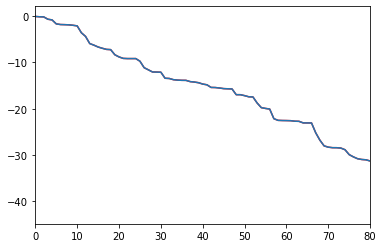

In [94]:
cs = np.array([0.5,0]).reshape((2,1))
# cs = np.array([-0.99990545, 0.01375102]).reshape((2,1))
U = np.zeros((2,2))
V = np.zeros((2,2))
eps_phi = np.zeros((2,1))
espc = 0
llog = np.zeros((howlong,))
for i in range(howlong):
    # print('---')
    fbi = friendly_basis_rw2[i].reshape((2,1))
    U += fbi @ fbi.T @ y_pca_loads_R
    V += y_pca_loads_R.T @ fbi @ fbi.T @ y_pca_loads_R
    scaled_sigma = -U.T @ covar_sequence[i,:,:] * info_e2 @ U + V
    first_term = -cs.T @ scaled_sigma @ cs

    eps = noise_samples[i]
    eps_phi += eps * fbi
    G = covar_sequence[i,:,:] * info_e2 @ U - y_pca_loads_R
    second_term = 2 * eps_phi.T @ G @ cs

    third_term = eps_phi.T @ covar_sequence[i,:,:] * info_e2 @ eps_phi

    espc += np.square(eps)
    fourth_term = espc

    llog[i] = .5 * info_e2 * (first_term + second_term + third_term - fourth_term)
    # llog[i] = eps
plt.plot(llog,'r')
plt.plot(mls[1] - mls[0])
plt.xlim((0,80))

Let's visualize the margin added when bounding in this fashion:

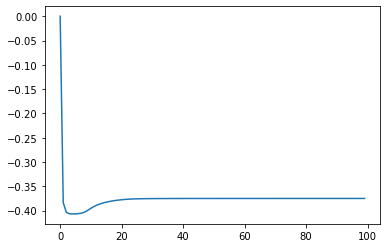

In [97]:
plt.plot(llog - (mls[1] - mls[0])[:100])

So the reconstruction is exact! Dahsed line is the reconstructed from formula, while continuous line is the entropy curve generated by OTQD. The formula on page 22 works.

After bounding the first term by $||c*|| \leq 1$:

(0.0, 80.0)

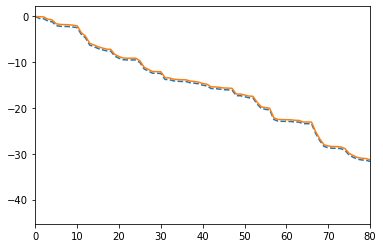

In [98]:
# cs = np.array([0.5,0]).reshape((2,1))
U = np.zeros((2,2))
V = np.zeros((2,2))
eps_phi = np.zeros((2,1))
espc = 0
llog = np.zeros((howlong,))
for i in range(howlong):
    # print('---')
    fbi = friendly_basis_rw2[i].reshape((2,1))
    U += fbi @ fbi.T @ y_pca_loads_R
    V += y_pca_loads_R.T @ fbi @ fbi.T @ y_pca_loads_R
    scaled_sigma = -U.T @ covar_sequence[i,:,:] * info_e2 @ U + V
    first_term = -eig(scaled_sigma)[0][0]

    eps = noise_samples[i]
    eps_phi += eps * fbi
    G = covar_sequence[i,:,:] * info_e2 @ U - y_pca_loads_R
    second_term = 2 * eps_phi.T @ G @ cs

    third_term = eps_phi.T @ covar_sequence[i,:,:] * info_e2 @ eps_phi

    espc += np.square(eps)
    fourth_term = espc

    llog[i] = .5 * info_e2 * (first_term + second_term + third_term - fourth_term)
    # llog[i] = eps
plt.plot(llog,'--')
plt.plot(mls[1] - mls[0])
plt.xlim((0,80))

Let's visualize the margin added when bounding in this fashion:

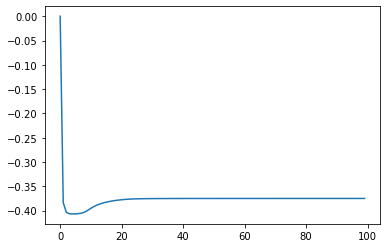

In [99]:
plt.plot(llog - (mls[1] - mls[0])[:100])

So the first bound seems to work. Not too far away! Now we move on to the second bound (i.e., bounding the second term)

lambda1  1149.4954816617874
lambda1  1183.328124508418
eps_phi 2.272198605369223e-18
Second term O: -0.0000 | 1: -0.0000
[0.99990416 0.01384458]
-
lambda1  265.0443162584864
lambda1  504.7638162727121
eps_phi 0.00010781535983237934
Second term O: 0.0044 | 1: -0.1088
[0.97319623 0.81660671]
-
lambda1  216.13041901055826
lambda1  478.42862273110745
eps_phi 0.001303221225274369
Second term O: 0.0115 | 1: -1.2470
[0.96689996 0.84674826]
-
lambda1  203.61677251242963
lambda1  469.2496754955887
eps_phi 0.0009614577708731806
Second term O: 0.0016 | 1: -0.9023
[0.96515142 0.85355095]
-
lambda1  196.67980643351945
lambda1  461.98240347732155
eps_phi 0.003956530345485246
Second term O: 0.0058 | 1: -3.6557
[0.96425941 0.85681204]
-
lambda1  191.8472269750522
lambda1  455.6487212060759
eps_phi 0.002449775270867155
Second term O: -0.0014 | 1: -2.2325
[0.96371734 0.85872968]
-
lambda1  186.91835821857822
lambda1  447.696701121806
eps_phi 0.006471040159539272
Second term O: 0.0017 | 1: -5.7941
[0.963

(0.0, 100.0)

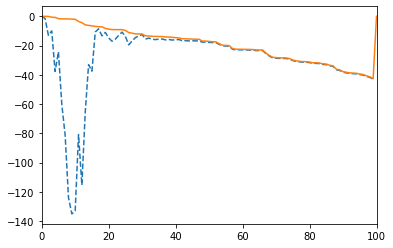

In [101]:
cs = np.array([0.97387034, 0.22710474]).reshape((2,1))
U = np.zeros((2,2))
V = np.zeros((2,2))
eps_phi = np.zeros((2,1))
espc = 0
llog = np.zeros((howlong,))
for i in range(howlong):
    # print('---')
    fbi = friendly_basis_rw2[i].reshape((2,1))
    U += fbi @ fbi.T @ y_pca_loads_R
    V += y_pca_loads_R.T @ fbi @ fbi.T @ y_pca_loads_R
    scaled_sigma = -U.T @ covar_sequence[i,:,:] * info_e2 @ U + V
    first_term = -cs.T @ scaled_sigma @ cs
    # first_term = -np.linalg.eig(scaled_sigma)[0][0]

    eps = noise_samples[i]
    eps_phi += eps * fbi
    G = -covar_sequence[i,:,:] * info_e2 @ U + y_pca_loads_R
    # print('G\'s eigenvalues ', np.linalg.eig(G)[0])
    # print(G @ np.linalg.eig(G)[1][0])
    second_term_original = -2 * eps_phi.T @ G @ cs
    # print('G cs', np.linalg.norm(G @ cs))
    print('lambda1 ', np.linalg.norm(G @ cs))
    print('lambda1 ', eig(G)[0][0])
    print('eps_phi', np.linalg.norm(eps_phi))
    # second_term_original = -2 * np.linalg.norm(eps_phi) * np.linalg.norm(G @ cs)
    second_term = -2 * np.linalg.norm(eps_phi) * eig(G)[0][0]
    print('Second term O: {:.4f} | 1: {:.4f}'.format(second_term_original.item(), second_term))
    print(eig(G)[1][0])
    print('-')
    third_term = eps_phi.T @ covar_sequence[i,:,:] * info_e2 @ eps_phi
    espc += np.square(eps)
    fourth_term = espc

    llog[i] = .5 * info_e2 * (first_term + second_term + third_term - fourth_term)
    # llog[i] = eps
plt.plot(llog,'--')
plt.plot(mls[1] - mls[0])
plt.xlim((0,100))

Honestly this seems quite dramatic! But there's a catch.

**Conclusion:** the impact of the second term can be great, but very unlikely because it requires the accumulated noise vector to be in the direction of the eigenvector, for a signficant period of time, while $c*$ is located at the same direction (collinearity). 

This almost never happens in reality.

Let's visualize the margin added when bounding in this fashion:

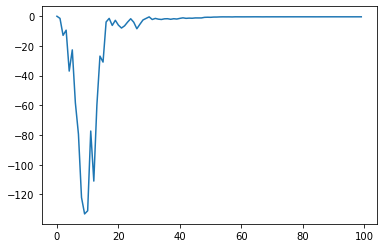

In [102]:
plt.plot(llog - (mls[1] - mls[0])[:100])

**Deleted the second term**, the final bound:

-6.587870191355613e-27
0.0
0.0
8.655273934928162e-18
2.5485746593190003e-17
(1.0865176331080662e-17+6.945289400776492e-18j)
(5.536436543715082e-17+0j)
(5.774968498240214e-17+1.7792774560442036e-17j)
(6.993900958943272e-17+6.354661712068114e-18j)
(2.42977354917686e-16+0j)
(9.879761320348846e-17+7.028822768768071e-17j)
(1.546952117704014e-16+1.0147105210594968e-16j)
(2.4711643995536276e-16+0j)
(2.158239914974699e-16+0j)
(5.0658427505477925e-16+0j)
(1.834143389877067e-16+0j)
(3.229388772189206e-16+0j)
(2.0209369814887226e-16+0j)
(1.3876686073069729e-16+0j)
(2.1380490680693917e-16+1.3056166772239568e-16j)
(2.4713385039712144e-16+0j)
(2.9685976738378146e-16+0j)
(1.4021126779326082e-16+3.842673507927658e-17j)
(2.2157260948549535e-16+0j)
(2.481107611384241e-16+0j)
(2.111293403109272e-16+0j)
(1.8484549384842086e-16+8.465703762728687e-17j)
(1.7109945346132854e-16+7.196539552909187e-17j)
(9.200260631824546e-17+3.338901237436143e-17j)
(1.175559812355422e-16+0j)
(9.520134042004097e-17+8.4794170133

(0.0, 80.0)

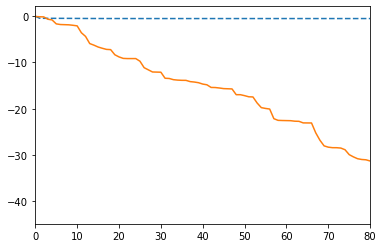

In [103]:
# cs = np.array([0.97387034, 0.22710474]).reshape((2,1))
U = np.zeros((2,2))
V = np.zeros((2,2))
phi = np.zeros((howlong, 2))
eps_phi = np.zeros((2,1))
espc = 0
llog = np.zeros((howlong,))
for i in range(howlong):
    # print('---')
    fbi = friendly_basis_rw2[i].reshape((2,1))
    U += fbi @ fbi.T @ y_pca_loads_R
    V += y_pca_loads_R.T @ fbi @ fbi.T @ y_pca_loads_R
    scaled_sigma = -U.T @ covar_sequence[i,:,:] * info_e2 @ U + V
    first_term = -cs.T @ scaled_sigma @ cs
    # first_term = -np.linalg.eig(scaled_sigma)[0][0]

    eps = noise_samples[i]
    eps_phi += eps * fbi
    G = -covar_sequence[i,:,:] * info_e2 @ U + y_pca_loads_R
    second_term = -2 * eps_phi.T @ G @ cs
    
    espc += np.square(eps)
    # fourth_term = espc
    # W matrix will be the weight of the chi-square distributed noise random vector
    phi[i,:] = fbi.reshape(-1)
    W = -phi[:i+1,:] @ covar_sequence[i,:,:] * info_e2 @ phi[:i+1,:].T
    W_eig = eig(W)[0]
    print(W_eig[0])
    third_term = -np.linalg.norm(espc) ** 2 * np.real(W_eig[0])

    llog[i] = .5 * info_e2 * (first_term + 0 + third_term)
    # llog[i] = eps
plt.plot(llog,'--')
plt.plot(mls[1] - mls[0])
plt.xlim((0,80))

Basically only the chi-squared r.v left if all other terms avoid the eigenvectors (which is a plausible assumption). We calculate the CDF:

In [104]:
from scipy.stats import chi2

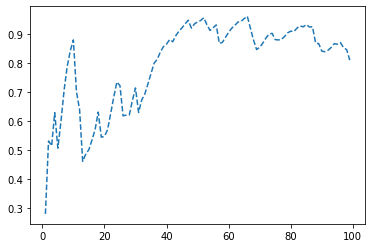

In [106]:
# cs = np.array([0.5,0]).reshape((2,1))
U = np.zeros((2,2))
V = np.zeros((2,2))
eps_phi = np.zeros((2,1))
espc = 0
llh_curve = mls[1] - mls[0]
llog = np.zeros((howlong,))
for i in range(howlong):
    # print('---')
    fbi = friendly_basis_rw2[i].reshape((2,1))
    U += fbi @ fbi.T @ y_pca_loads_R
    V += y_pca_loads_R.T @ fbi @ fbi.T @ y_pca_loads_R
    scaled_sigma = -U.T @ covar_sequence[i,:,:] * info_e2 @ U + V
    first_term = -eig(scaled_sigma)[0][0]

    z = -info_e2 * first_term - 2 * llh_curve[i]
    cdf_score = chi2.cdf(z,i)
    # print(z, cdf_score)
    llog[i] = 1- cdf_score

    # llog[i] = .5 * info_e2 * (first_term + second_term + third_term - fourth_term)
    # llog[i] = eps
plt.plot(llog,'--')